In [1]:
import pandas as pd
from pandas_datareader import data as web   # Package and modules for importing data; this code may change depending on pandas version
import datetime
 
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2017,1,1)
end = datetime.date.today()
 
# Let's get Apple stock data; Apple's ticker symbol is AAPL
# First argument is the series we want, second is the source ("yahoo" for Yahoo! Finance), third is the start date, fourth is the end date
atos = web.DataReader('ATO', 'morningstar', start, end)
accn = web.DataReader('ACN', 'morningstar', start, end)
ibm = web.DataReader('IBM', 'morningstar', start, end)
#capg = web.DataReader('CAP', 'morningstar', start, end)
type(atos)
type(accn)


pandas.core.frame.DataFrame

In [2]:
atos.reset_index(inplace=True)
atos.set_index("Date", inplace=True)
atos = atos.drop("Symbol", axis=1)
atos.head()

,Close,High,Low,Open,Volume
Date,,,,,
2017-01-02,74.15,74.15,74.150,74.15,0
2017-01-03,74.55,74.55,73.645,74.34,451527
2017-01-04,74.97,75.79,74.660,74.66,664355
2017-01-05,74.60,75.50,74.010,74.89,398687
2017-01-06,74.17,74.60,74.010,74.36,510494


In [3]:
accn.reset_index(inplace=True)
accn.set_index("Date", inplace=True)
accn = accn.drop("Symbol", axis=1)
accn.head()

,Close,High,Low,Open,Volume
Date,,,,,
2017-01-02,117.13,117.13,117.13,117.13,0
2017-01-03,116.46,117.81,115.82,117.38,2352157
2017-01-04,116.74,117.80,116.43,116.91,2639772
2017-01-05,114.99,117.14,114.95,116.98,3685380
2017-01-06,116.30,116.74,114.34,114.99,4125269


In [4]:
ibm.reset_index(inplace=True)
ibm.set_index("Date", inplace=True)
ibm = ibm.drop("Symbol", axis=1)
ibm.head()
#capg.head()

,Close,High,Low,Open,Volume
Date,,,,,
2017-01-02,165.99,165.99,165.99,165.99,0
2017-01-03,167.19,167.87,166.01,167.00,2934119
2017-01-04,169.26,169.87,167.36,167.77,3381432
2017-01-05,168.70,169.39,167.26,169.25,2682181
2017-01-06,169.53,169.92,167.52,168.69,2945536


Populating the interactive namespace from numpy and matplotlib


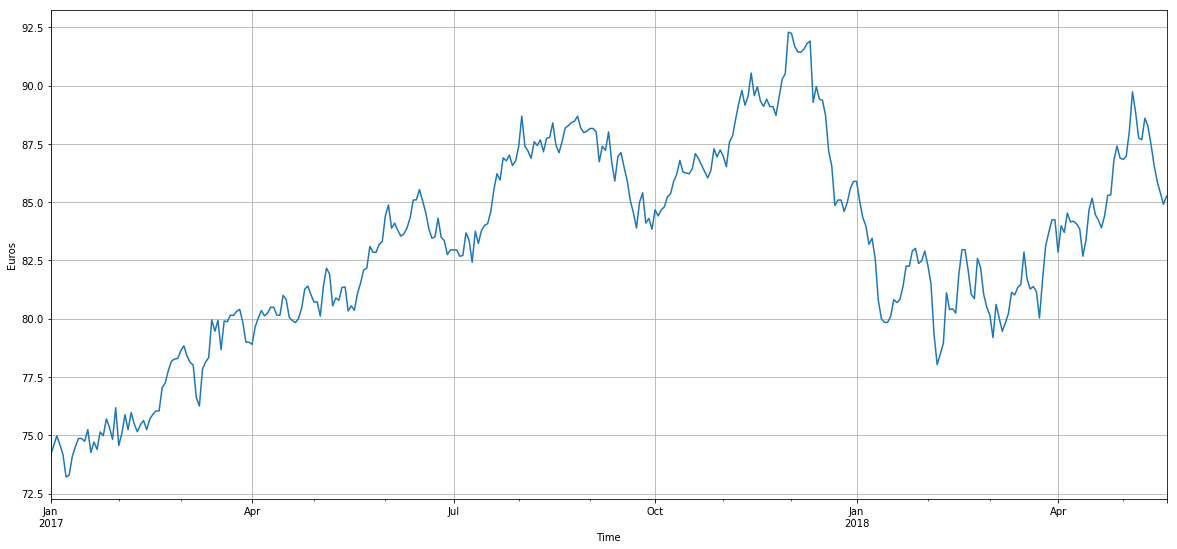

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 9)
atos["Close"].plot(grid = True)
plt.xlabel("Time")
plt.ylabel("Euros")

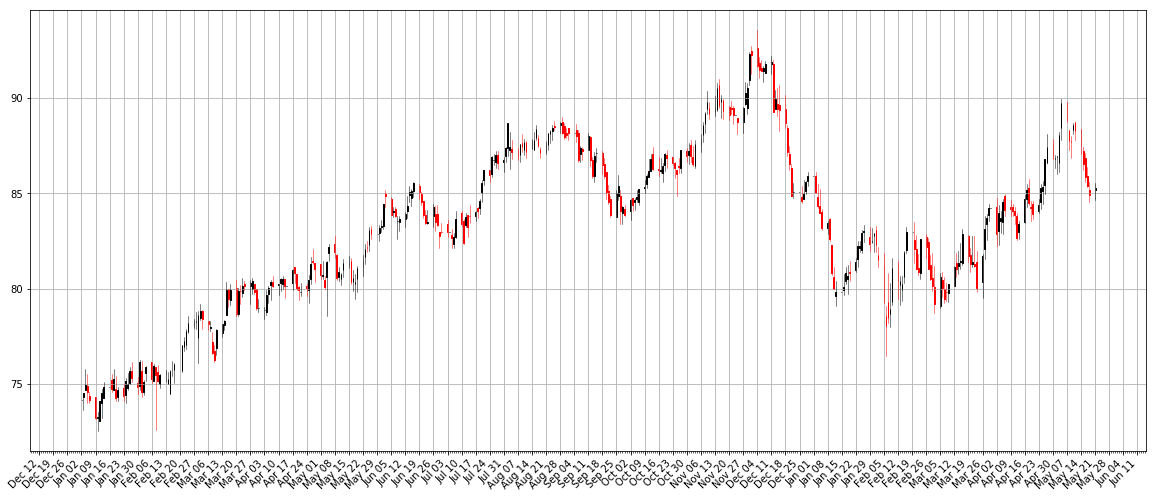

In [6]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from matplotlib.finance import candlestick_ohlc
import numpy as np
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()
 
pandas_candlestick_ohlc(atos)

In [7]:
stocks = pd.DataFrame({"ATOS" : atos["Close"], "ACCN" : accn["Close"], "IBM" : ibm["Close"]})
stocks.head()

,ACCN,ATOS,IBM
Date,,,
2017-01-02,117.13,74.15,165.99
2017-01-03,116.46,74.55,167.19
2017-01-04,116.74,74.97,169.26
2017-01-05,114.99,74.60,168.70
2017-01-06,116.30,74.17,169.53


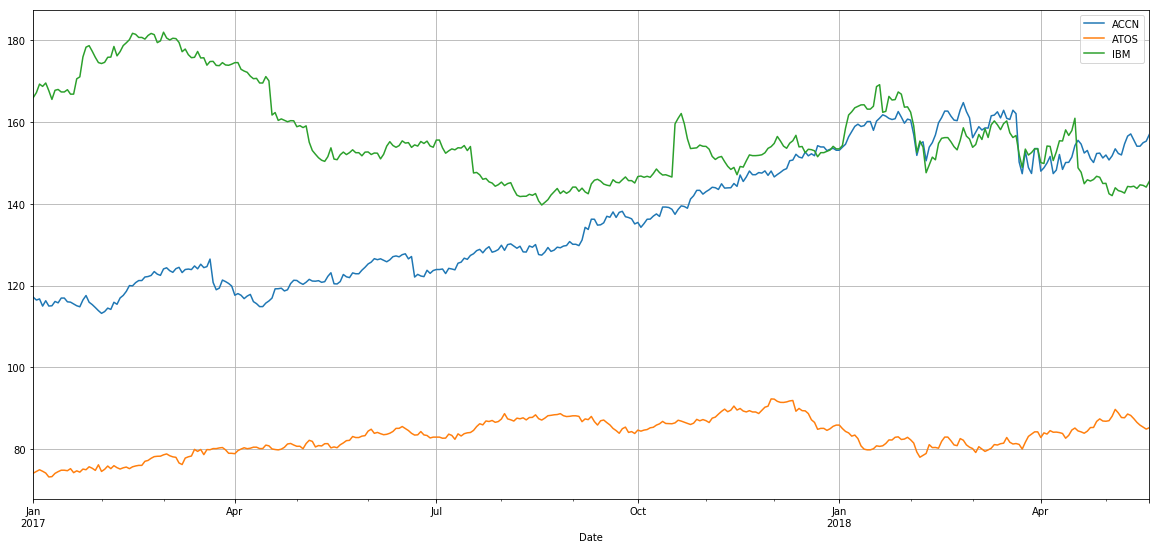

In [8]:
stocks.plot(grid=True)

In [9]:
stocks_return = stocks.apply(lambda x : log(x) - log(x.shift(1)))
stocks_return.head()

,ACCN,ATOS,IBM
Date,,,
2017-01-02,NaN,NaN,NaN
2017-01-03,-0.005737,0.005380,0.007203
2017-01-04,0.002401,0.005618,0.012305
2017-01-05,-0.015104,-0.004948,-0.003314
2017-01-06,0.011328,-0.005781,0.004908


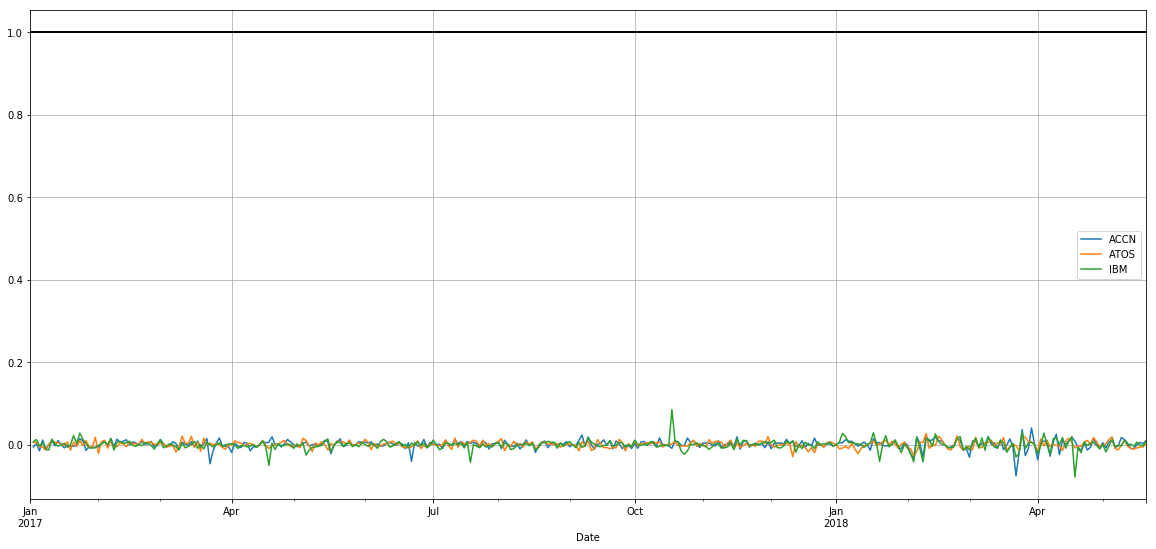

In [10]:
stocks_return.plot(grid=True).axhline(y=1, color = "Black", lw =2)

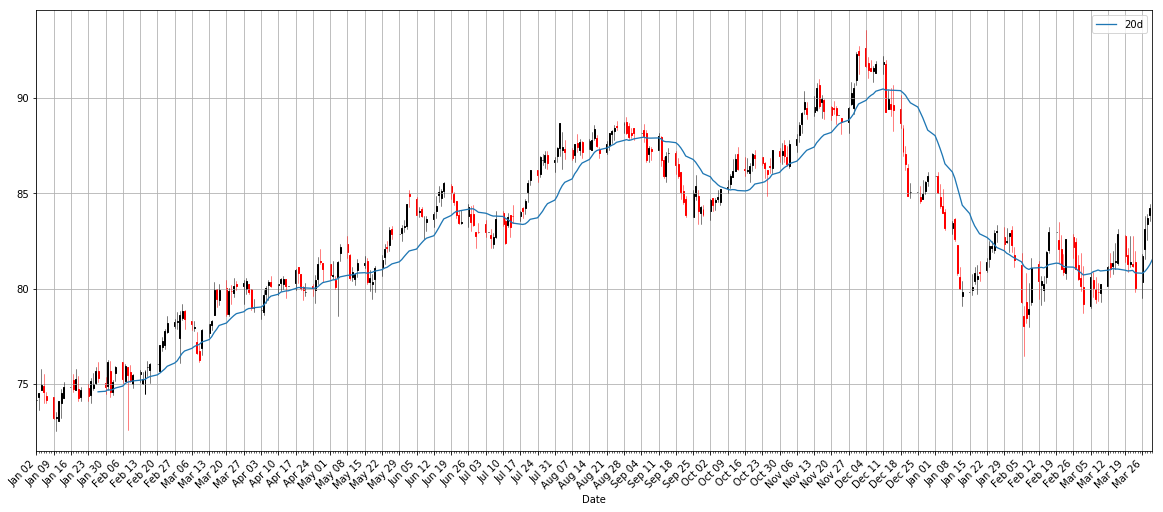

In [11]:
atos["20d"] = np.round(atos["Close"].rolling(window = 20, center = False).mean(),2)
pandas_candlestick_ohlc(atos.loc['2017-01-01':'2018-04-01',:],otherseries = "20d")

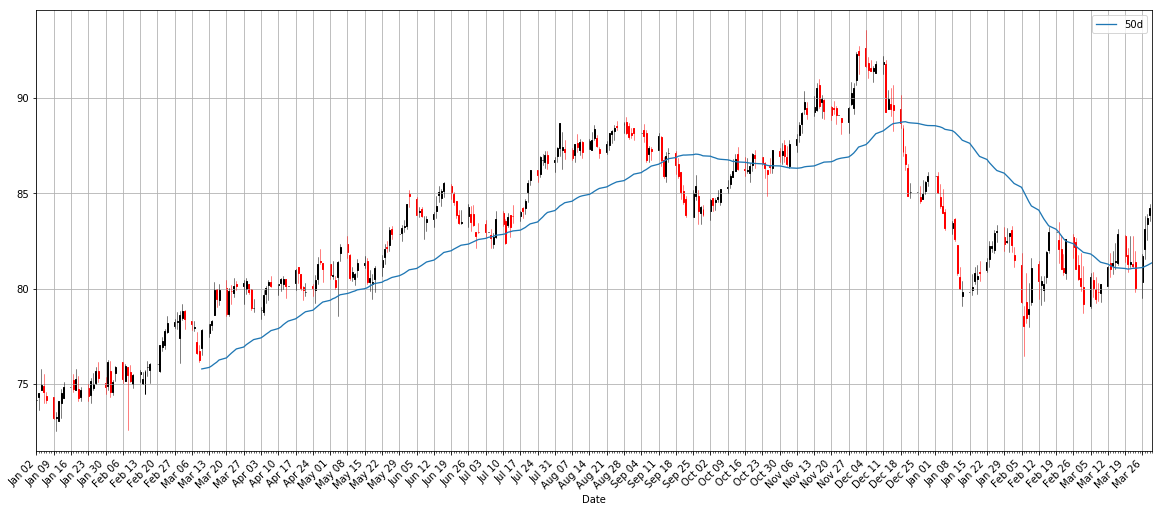

In [12]:
atos["50d"] = np.round(atos["Close"].rolling(window = 50, center = False).mean(), 2)
pandas_candlestick_ohlc(atos.loc['2017-01-01':'2018-04-01',:],otherseries = "50d")

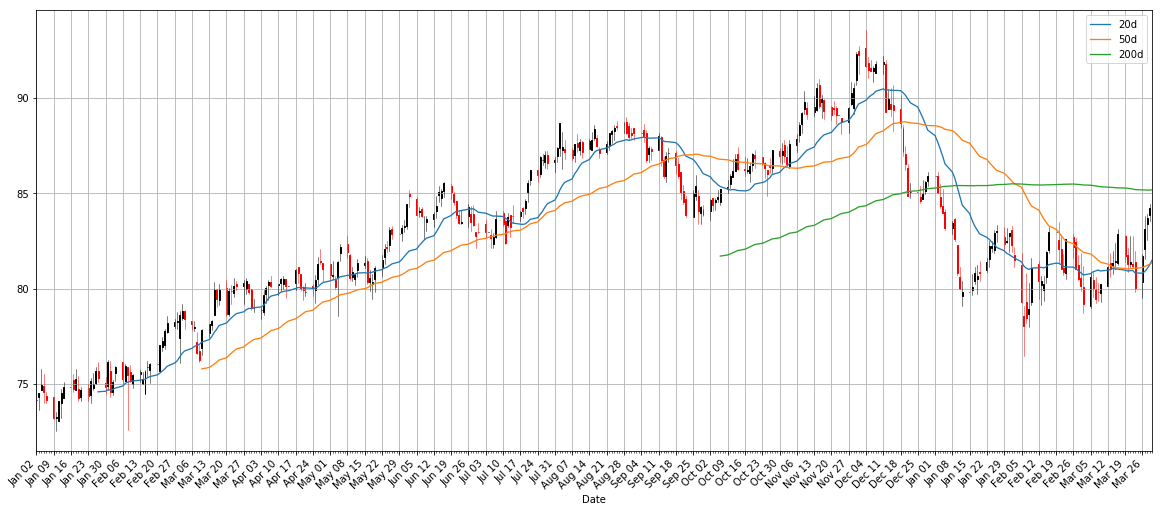

In [13]:
atos["200d"] = np.round(atos["Close"].rolling(window = 200, center = False).mean(), 2)
pandas_candlestick_ohlc(atos.loc['2017-01-01':'2018-04-01',:],otherseries = ["20d","50d","200d"])

In [14]:
atos.head(10)

,Close,High,Low,Open,Volume,20d,50d,200d
Date,,,,,,,,
2017-01-02,74.15,74.15,74.150,74.15,0,NaN,NaN,NaN
2017-01-03,74.55,74.55,73.645,74.34,451527,NaN,NaN,NaN
2017-01-04,74.97,75.79,74.660,74.66,664355,NaN,NaN,NaN
2017-01-05,74.60,75.50,74.010,74.89,398687,NaN,NaN,NaN
2017-01-06,74.17,74.60,74.010,74.36,510494,NaN,NaN,NaN
2017-01-09,73.21,74.33,73.150,74.33,318704,NaN,NaN,NaN
2017-01-10,73.29,73.54,72.540,73.24,459103,NaN,NaN,NaN
2017-01-11,74.09,74.09,73.080,73.08,338545,NaN,NaN,NaN
2017-01-12,74.51,74.74,73.210,74.01,490703,NaN,NaN,NaN


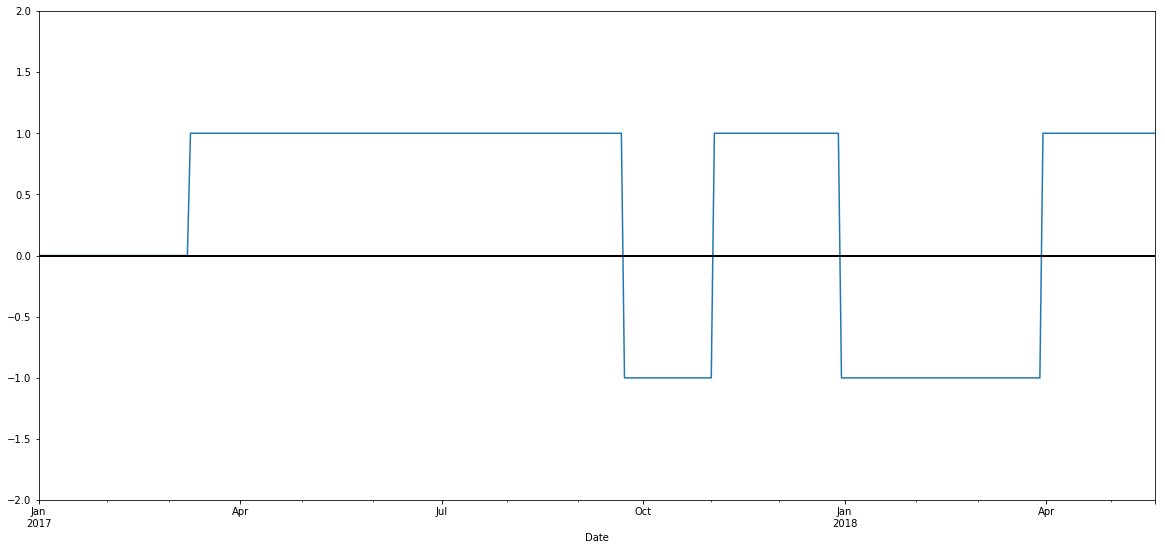

In [15]:
atos["20d-50d"] = atos["20d"] - atos["50d"]
atos["Regime"] = np.where(atos["20d-50d"] > 0, 1, 0)
atos["Regime"] = np.where(atos["20d-50d"] < 0 ,-1, atos["Regime"])
atos.head(200)
atos.loc[:,"Regime"].plot(ylim = (-2,2)).axhline(y=0, color="black", lw=2)


In [16]:

atos["Regime"].value_counts()

 1    218
-1     94
 0     49
Name: Regime, dtype: int64